In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')

In [3]:
#reading the data into pandas dataframe
rating=pd.read_csv("rating.csv")
movie=pd.read_csv("movie.csv")

In [4]:
total_data=pd.merge(rating,movie, on='movieId')

In [5]:
del rating
del movie

In [6]:
#converting the datetime column to proper format.
total_data['timestamp']=pd.to_datetime(total_data['timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S')

In [7]:
#total_data['timestamp'].apply(to_pydatetime())
total_data['Year']=total_data['timestamp'].dt.year
del total_data['timestamp']

In [8]:
subset=total_data[total_data['Year']>=2005]
del total_data
subset['Year']=subset['Year'].astype('str')

In [9]:
subset.to_csv("file3.csv")

In [54]:
subset.groupby(['Year'])['userId'].size().reset_index(name='counts')

,Year,counts
0,2005,1803158
1,2006,1171836
2,2007,1053430
3,2008,1158777
4,2009,930036
5,2010,903691
6,2011,766366
7,2012,731389
8,2013,599327
9,2014,562888


Text(0.5, 1.0, 'Trend of number of users rating per year')

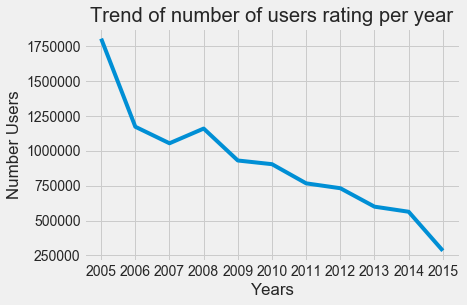

In [122]:
plt.plot(subset.groupby(['Year'])['userId'].size().reset_index(name='counts').Year,subset.groupby(['Year'])['userId'].size().reset_index(name='counts').counts)
#plt.figure(figsize=(100,20))
plt.xlabel("Years")
plt.ylabel("Number Users")
plt.title("Trend of number of users rating per year")

In [157]:
x=subset['genres'].value_counts().sort_values(ascending=False).reset_index(name='counts')
sum=x[5:].counts.sum()
#row=pd.Series()
y=x[0:5].copy()
y.loc[5] = ['Others',sum] 
# adding a row
#df.index = df.index + 1  # shifting index
#df = df.sort_index() 

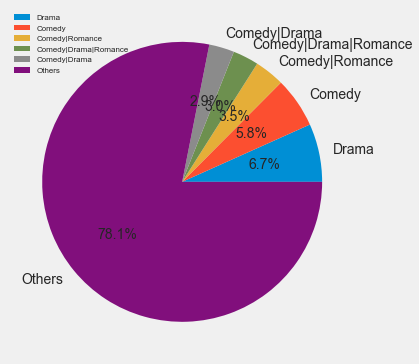

In [202]:
#plt.figure(figsize = (6,4))
y.set_index('index').plot.pie(subplots = True,figsize = (12,6),autopct = '%.1f%%')
plt.legend(loc=2,prop = {'size':8})
plt.ylabel('')
plt.show()

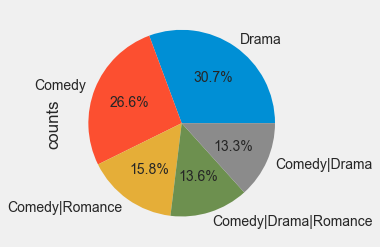

In [120]:
subset['genres'].value_counts().sort_values(ascending=False)[0:5].reset_index(name='counts').set_index('index').plot(kind = 'pie',subplots = True,autopct = '%.1f%%')
plt.legend('')

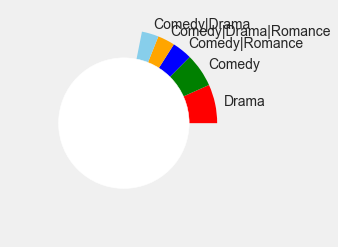

In [110]:
# library
import matplotlib.pyplot as plt
 
# create data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(subset['genres'].value_counts().sort_values(ascending=False)[0:5].reset_index(name='counts').counts/subset.shape[0], labels=subset['genres'].value_counts().sort_values(ascending=False)[0:5].reset_index(name='counts')['index'], colors=['red','green','blue','orange','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [210]:
new = subset.head(2000)

In [220]:
new.head(2)
subset.genres.value_counts()[0:5].reset_index()['index']

0                   Drama
1                  Comedy
2          Comedy|Romance
3    Comedy|Drama|Romance
4            Comedy|Drama
Name: index, dtype: object

In [221]:
subset=subset[subset['genres'].isin(list(subset.genres.value_counts()[0:5].reset_index()['index']))]

In [224]:
subset.head(2)

,userId,movieId,rating,title,genres,Year
190504,1,223,4.0,Clerks (1994),Comedy,2005
190510,25,223,4.5,Clerks (1994),Comedy,2010


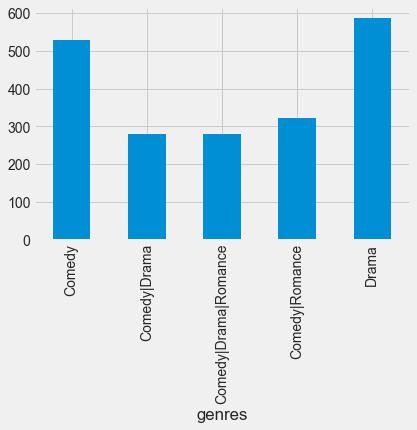

In [228]:
subset.sample(2000).groupby('genres')['rating'].count().plot(kind = 'bar')

In [231]:
new = subset.sample(2000)

In [233]:
new.head(3)

,userId,movieId,rating,title,genres,Year
2387734,115990,6807,4.5,Monty Python's The Meaning of Life (1983),Comedy,2008
10072440,99754,954,3.5,Mr. Smith Goes to Washington (1939),Drama,2008
7970735,94484,2706,3.0,American Pie (1999),Comedy|Romance,2008


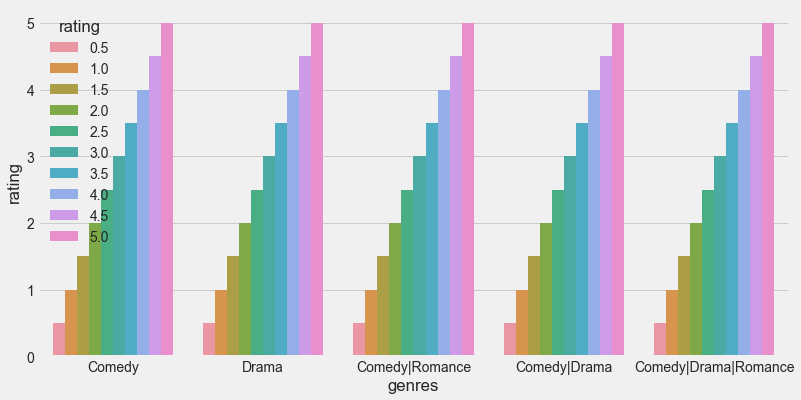

In [235]:
plt.figure(figsize = (12,6))
import seaborn as sns
sns.barplot(x = new['genres'], y = 'rating', data = new, hue = 'rating' )

In [293]:
x = new.groupby(['genres','movieId'])['rating'].mean().reset_index().sort_values(by='rating',ascending = False)
x.head()

,genres,movieId,rating
177,Comedy,7983,5.0
825,Drama,27803,5.0
758,Drama,4297,5.0
554,Comedy|Romance,4743,5.0
219,Comedy,63131,5.0


In [296]:
x['rating']=x['rating'].apply(round)

In [299]:
#x['rating']=x['rating'].astype('str')
x.groupby(['genres','rating']).size().reset_index(name='counts').to_csv('file1.csv') 

In [278]:
x.groupby(['genres','movieId'])['rating'].count().reset_index().genres.unique()

array(['Comedy', 'Comedy|Drama', 'Comedy|Drama|Romance', 'Comedy|Romance',
       'Drama'], dtype=object)

In [268]:
new[new['movieId'] == 306]

,userId,movieId,rating,title,genres,Year
14940270,13110,306,5.0,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,2011


In [300]:
new.groupby(['','movieId'])['rating'].mean().reset_index().head(2)

KeyError: ''

In [304]:
new['rating']=round(new['rating'])

In [306]:
new['rating']=new['rating'].astype('str')

In [311]:
new.groupby(['genres','rating']).size().reset_index(name='counts')

,genres,rating,counts
0,Comedy,0.0,14
1,Comedy,1.0,20
2,Comedy,2.0,114
3,Comedy,3.0,99
4,Comedy,4.0,262
5,Comedy,5.0,42
6,Comedy|Drama,0.0,3
7,Comedy|Drama,1.0,5
8,Comedy|Drama,2.0,33
9,Comedy|Drama,3.0,45


In [307]:
new.head(2)

,userId,movieId,rating,title,genres,Year
2387734,115990,6807,4.0,Monty Python's The Meaning of Life (1983),Comedy,2008
10072440,99754,954,4.0,Mr. Smith Goes to Washington (1939),Drama,2008
